In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import *
import numpy as np
emulator_aer_dm = Aer.get_backend('aer_simulator_density_matrix')

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.valencia.fake_valencia.FakeValenciaV2,
 qiskit.providers.fake_provider.backends.ourense.fake_ourense.FakeOurenseV2,
 qiskit.providers.fake_provider.backends.athens.fake_athens.FakeAthensV2,
 qiskit.providers.fake_provider.backends.geneva.fake_geneva.FakeGeneva,
 qiskit.providers.fake_provider.backends.armonk.fake_armonk.FakeArmonkV2]

In [3]:
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"),]  

for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print(i[1],"\n")
    print(circuit.draw())

bitcode3 

              ┌───┐                                                    ┌─┐     »
         q_0: ┤ X ├──■─────────────────■────────────────────■──────────┤M├─────»
              └───┘┌─┴─┐┌───┐┌─┐     ┌─┴─┐┌───┐   ┌─┐     ┌─┴─┐┌───┐   └╥┘     »
         q_1: ─────┤ X ├┤ X ├┤M├─|0>─┤ X ├┤ X ├───┤M├─|0>─┤ X ├┤ X ├────╫──────»
                   └───┘└─┬─┘└╥┘     └───┘└─┬─┘   └╥┘     └───┘└─┬─┘    ║      »
         q_2: ──■─────────■───╫────────■────■──────╫────────■────■──────╫──────»
              ┌─┴─┐┌───┐ ┌─┐  ║      ┌─┴─┐┌───┐┌─┐ ║      ┌─┴─┐┌───┐┌─┐ ║      »
         q_3: ┤ X ├┤ X ├─┤M├──╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─┤ X ├┤ X ├┤M├─╫──|0>─»
              ├───┤└─┬─┘ └╥┘  ║      └───┘└─┬─┘└╥┘ ║      └───┘└─┬─┘└╥┘ ║  ┌─┐ »
         q_4: ┤ X ├──■────╫───╫─────────────■───╫──╫─────────────■───╫──╫──┤M├─»
              └───┘       ║   ║                 ║  ║                 ║  ║  └╥┘ »
    m_mcm0: 2/════════════╩═══╩═════════════════╬══╬═════════════════╬══╬═══╬══»
                 

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [5]:
def cut(j):
    l= str(j)
    import re; parts = l.split(".")
    j=parts[5]
    return j

In [6]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    fake=backend
    heading=cut(fake)
    print("------------------------BACKEND-NAME :: ", heading)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = fake().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label," :: ",score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,fake,job,score))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_valencia
bitcode3  ::  0.0
ghz3  ::  0.9067681325661445
hsim3  ::  0.9571132760733927
marmin_bell_3  ::  0.492
qaoa_swap_proxy3  ::  0.3679999957009663
qaoa_vanilla_proxy3  ::  0.9400000152049235
------------------------BACKEND-NAME ::  fake_ourense
bitcode3  ::  0.0
ghz3  ::  0.934993315460232
hsim3  ::  0.981446609406726
marmin_bell_3  ::  0.489
qaoa_swap_proxy3  ::  0.34399999491932376
qaoa_vanilla_proxy3  ::  0.9500000155504899
------------------------BACKEND-NAME ::  fake_athens
bitcode3  ::  0.0
ghz3  ::  0.9278922288635584
hsim3  ::  0.959446609406726
marmin_bell_3  ::  0.494
qaoa_swap_proxy3  ::  0.40199999680829324
qaoa_vanilla_proxy3  ::  0.964000016034283
------------------------BACKEND-NAME ::  fake_geneva
bitcode3  ::  0.0
ghz3  ::  0.8919091835788987
hsim3  ::  0.9771132760733926
marmin_bell_3  ::  0.488
qaoa_swap_proxy3  ::  0.35199999517987146
qaoa_vanilla_proxy3  ::  0.92

In [7]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(cut(fakes))
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_valencia ; CIRCUIT_NAME: bitcode3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.0


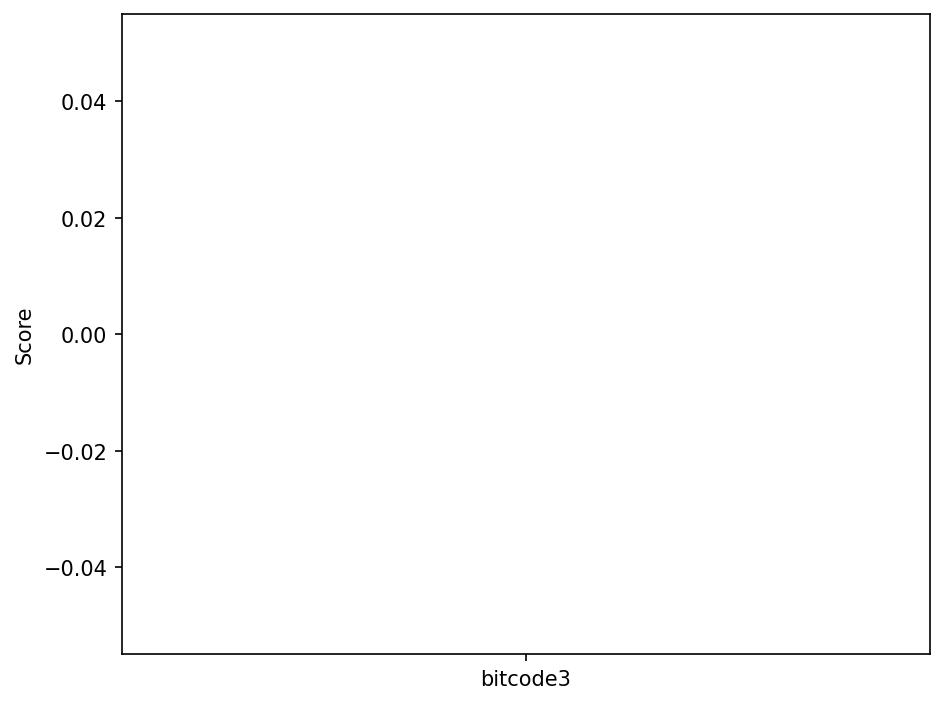

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: ghz3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9067681325661445


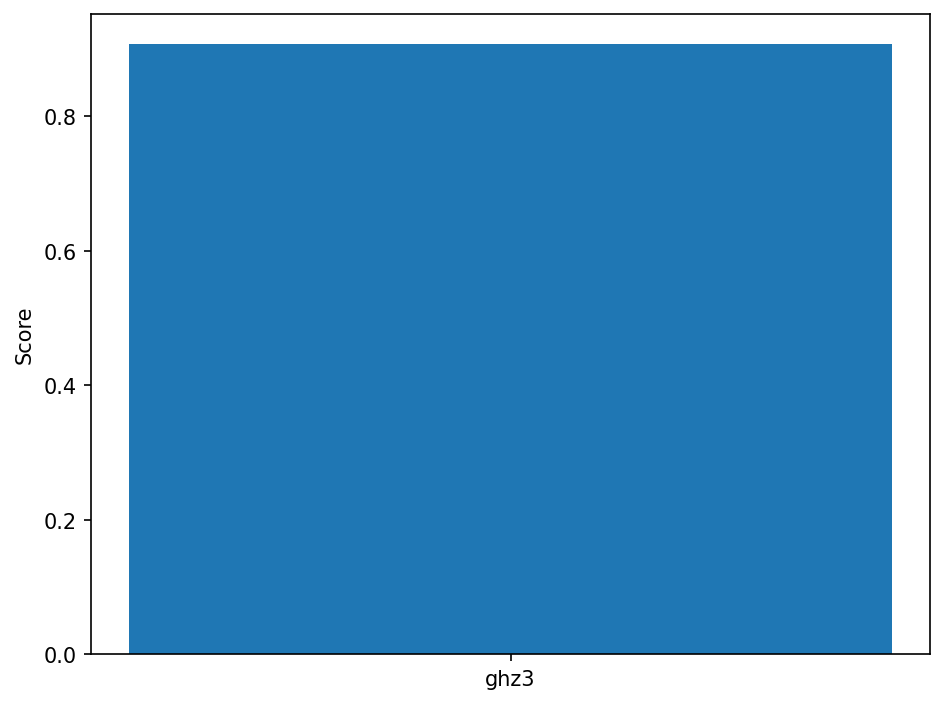

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: hsim3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9571132760733927


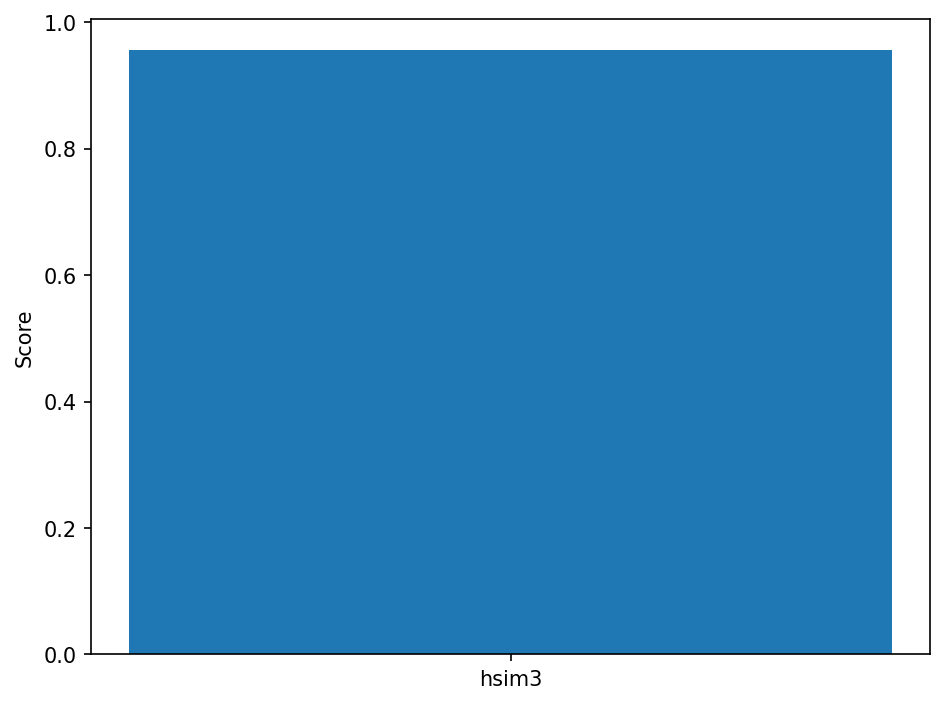

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: marmin_bell_3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.492


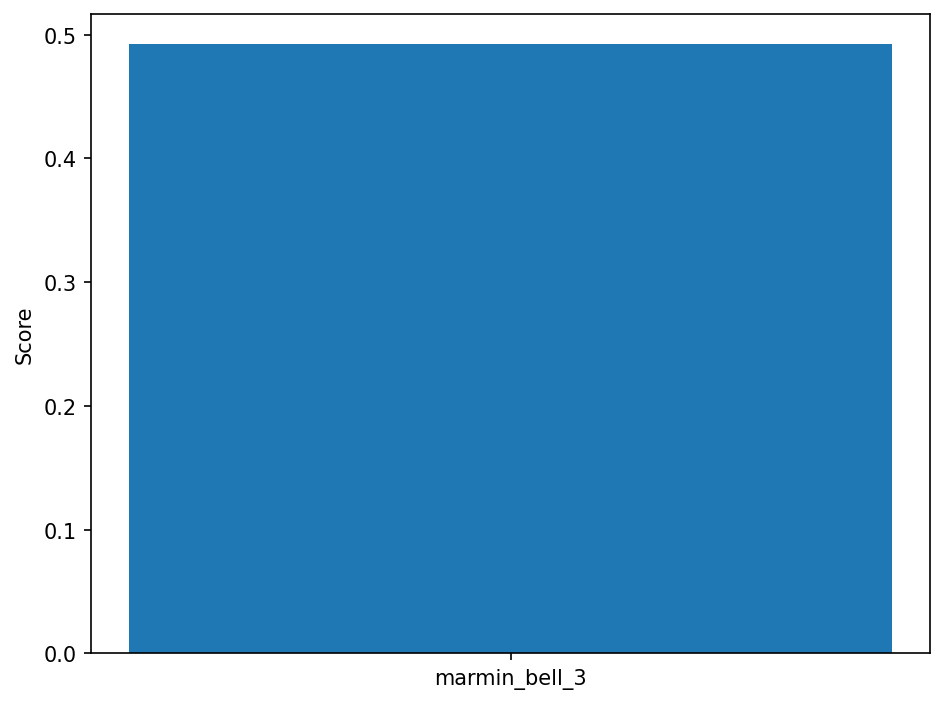

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: qaoa_swap_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.3679999957009663


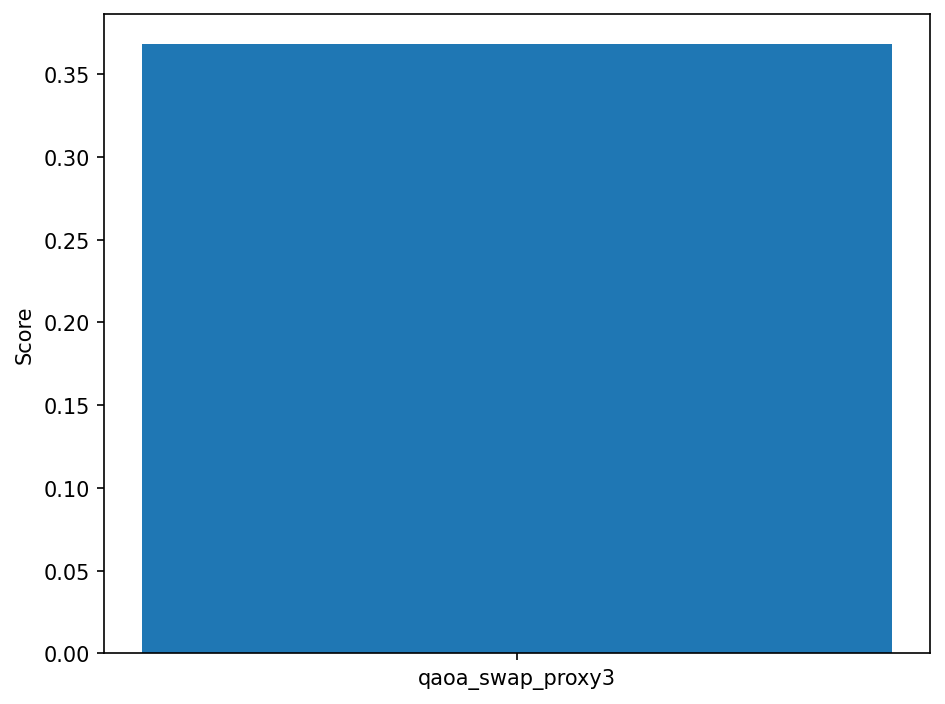

-----------------------------------------------------------
USED BACKEND:: fake_valencia ; CIRCUIT_NAME: qaoa_vanilla_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9400000152049235


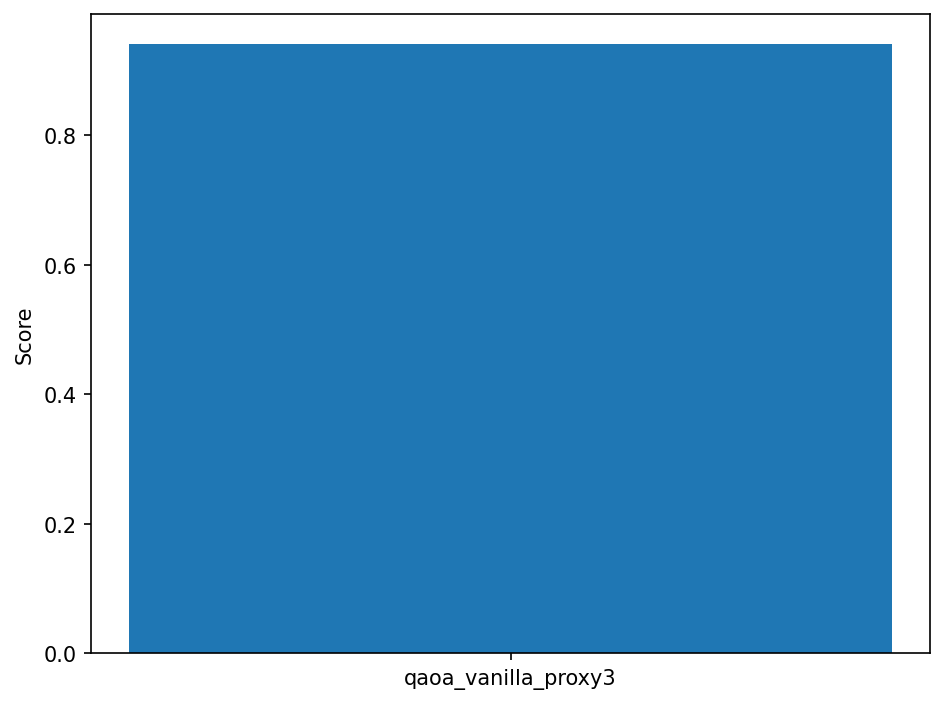

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: bitcode3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.0


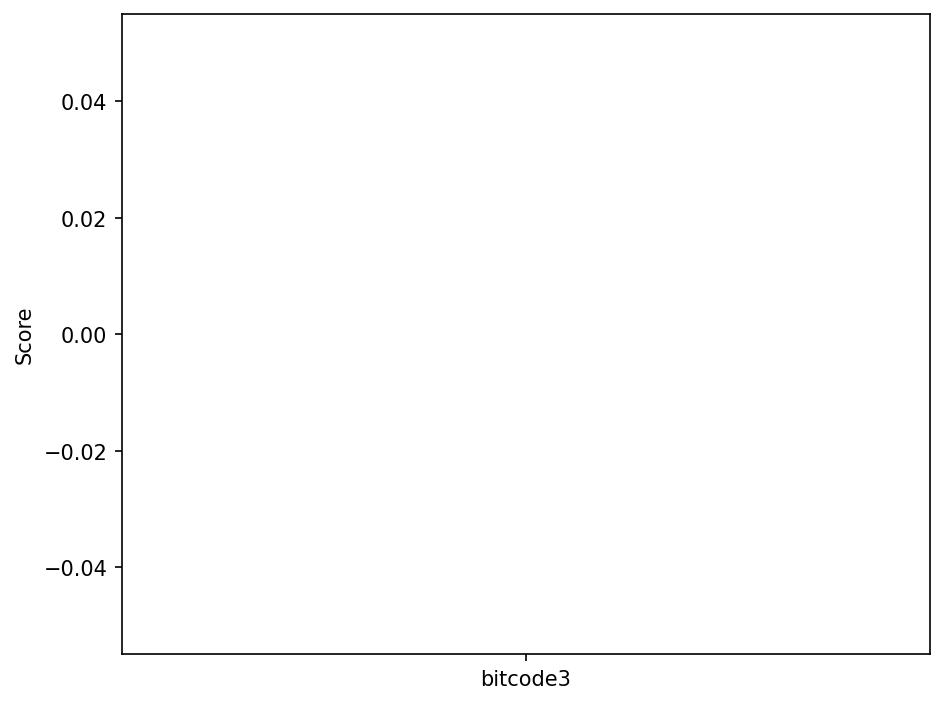

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: ghz3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.934993315460232


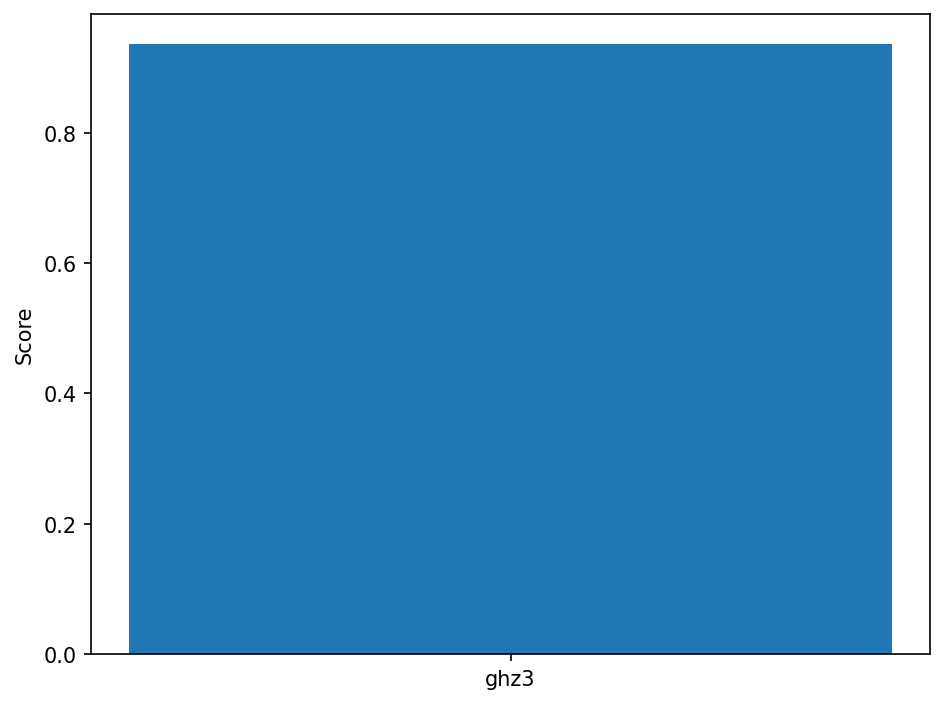

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: hsim3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.981446609406726


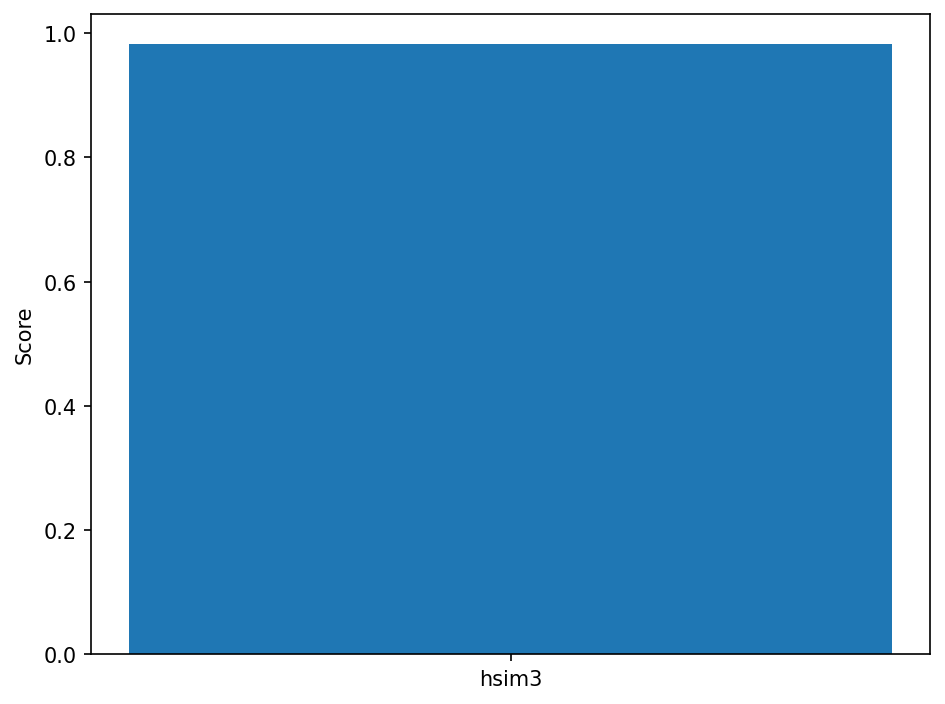

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: marmin_bell_3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.489


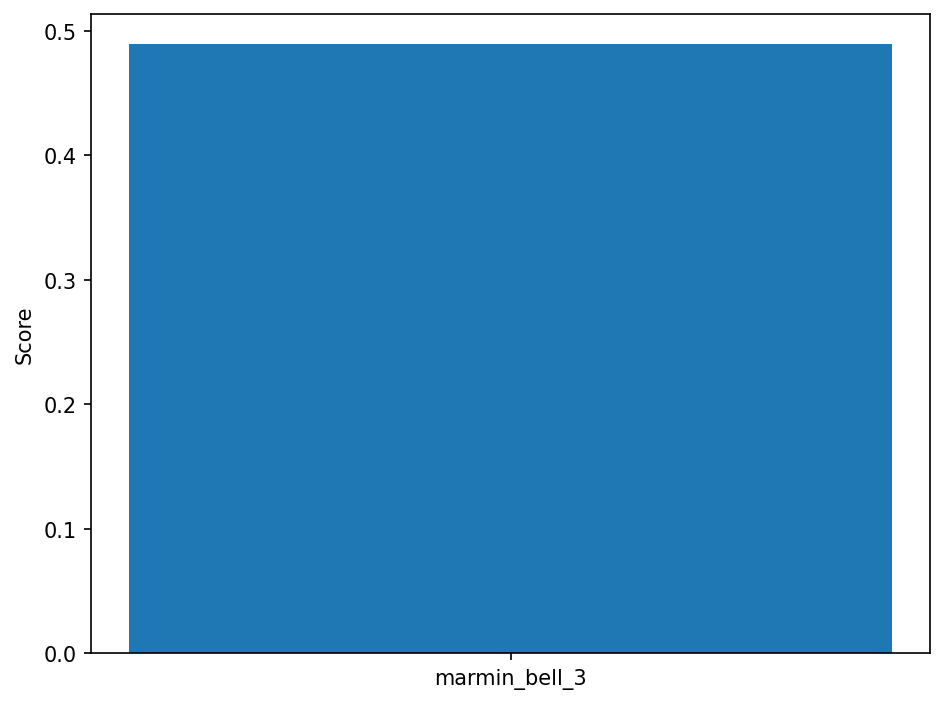

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: qaoa_swap_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.34399999491932376


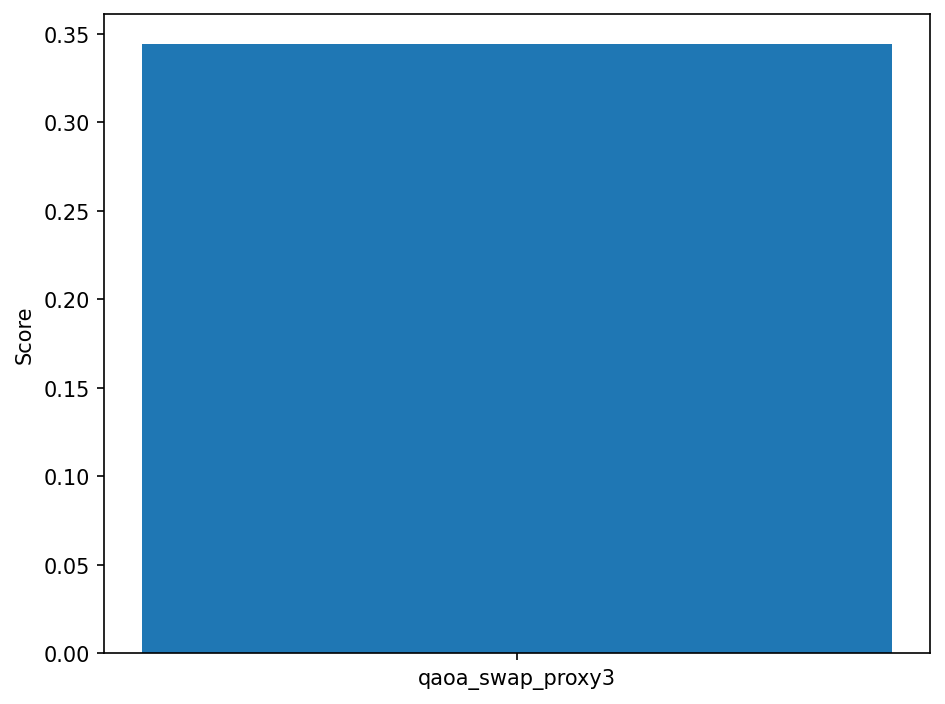

-----------------------------------------------------------
USED BACKEND:: fake_ourense ; CIRCUIT_NAME: qaoa_vanilla_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9500000155504899


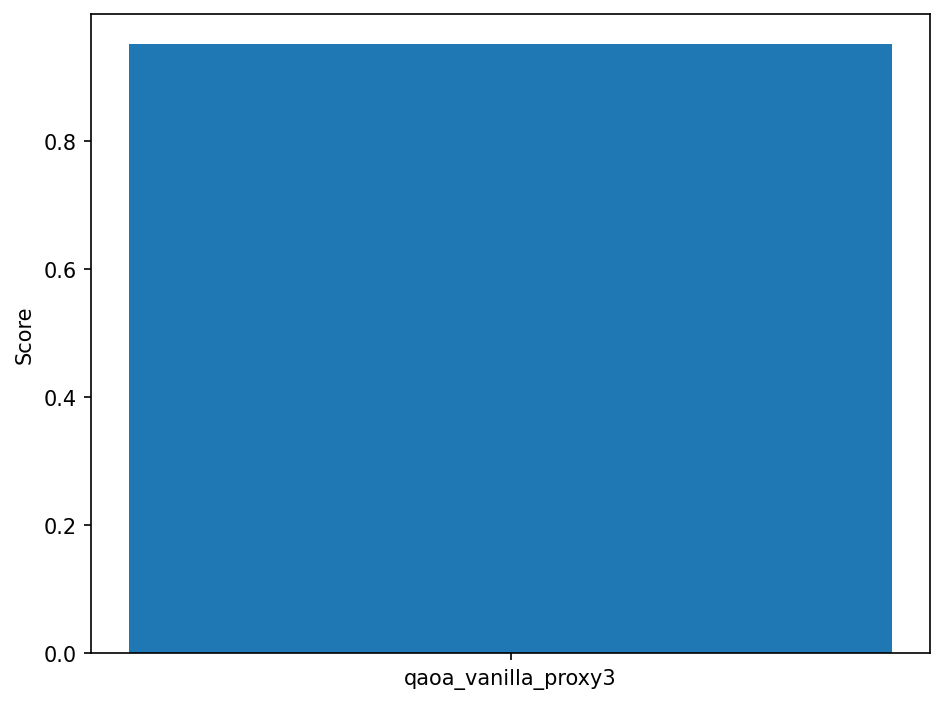

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: bitcode3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.0


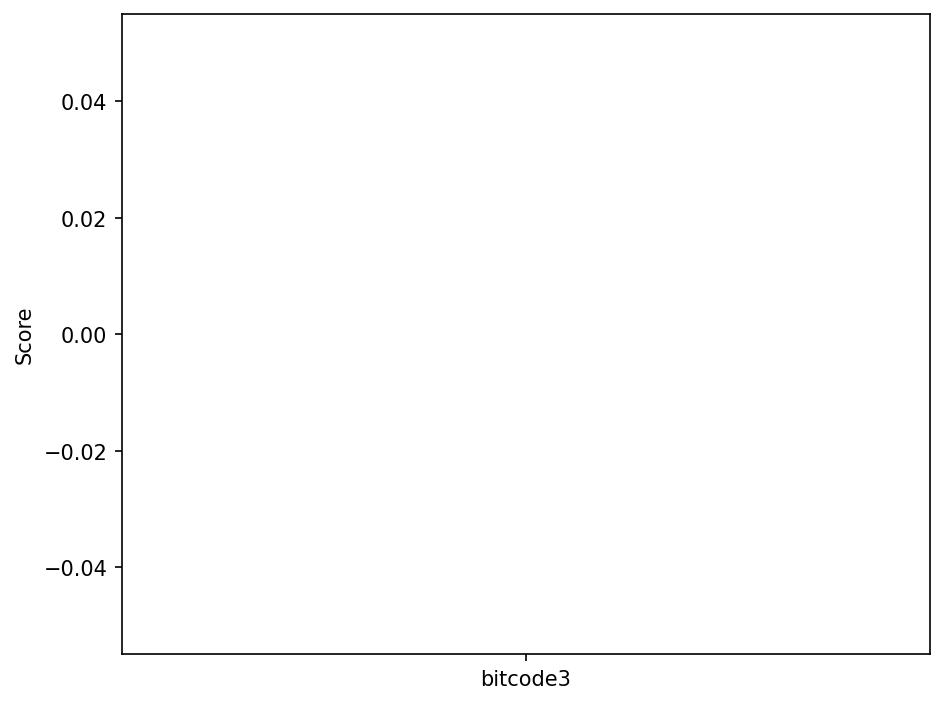

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: ghz3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9278922288635584


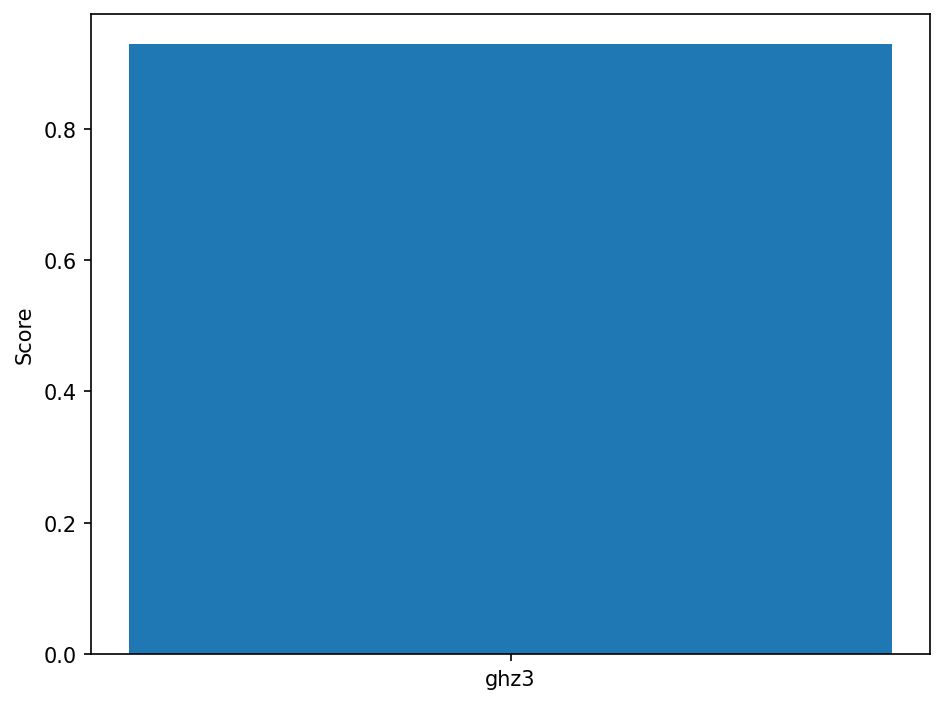

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: hsim3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.959446609406726


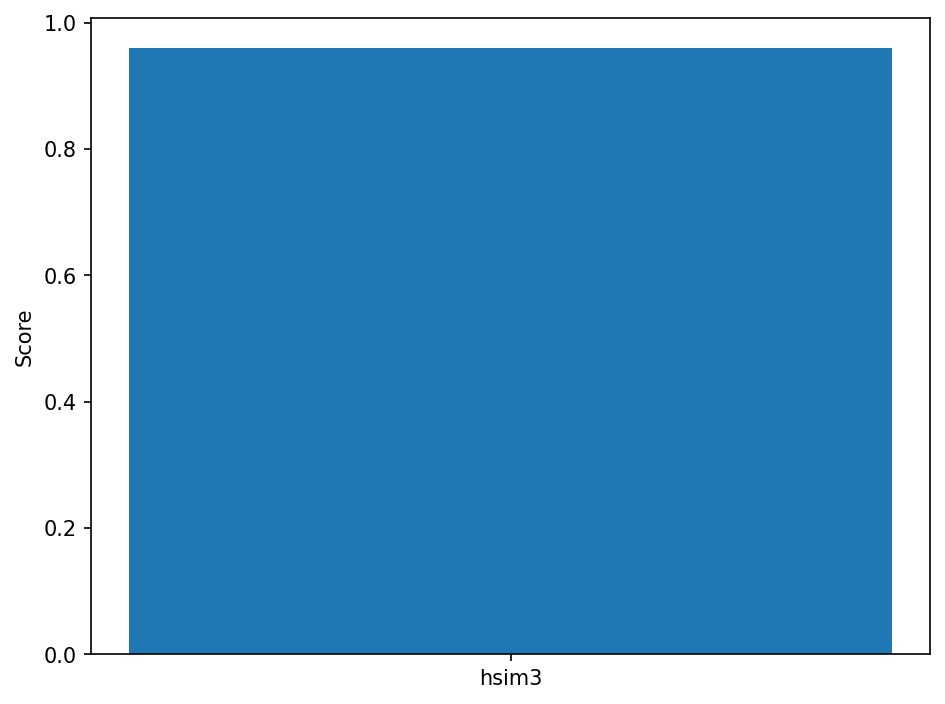

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: marmin_bell_3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.494


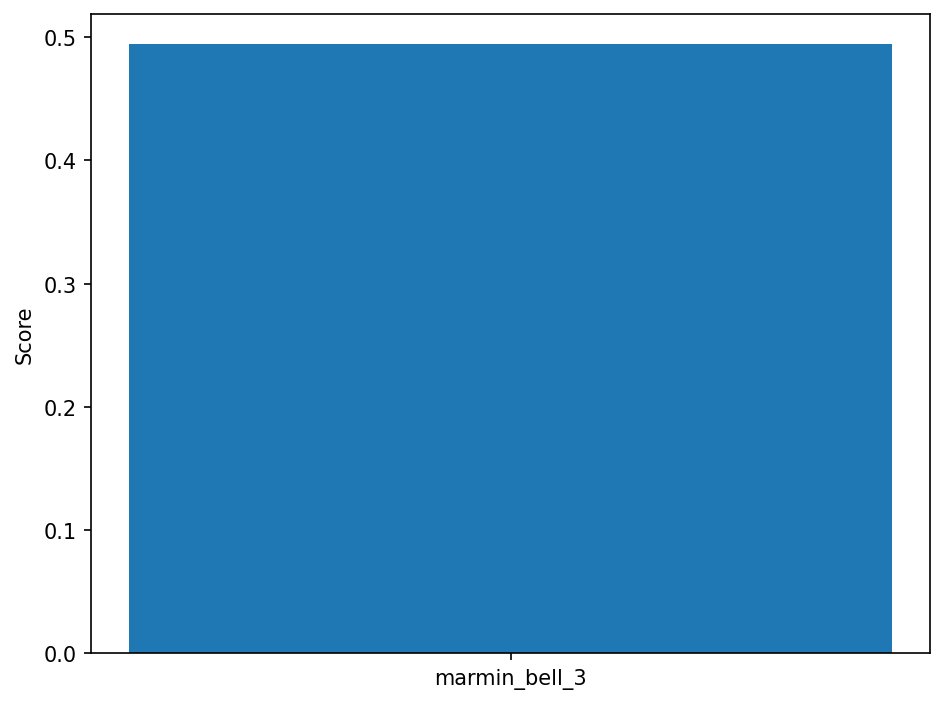

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_swap_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.40199999680829324


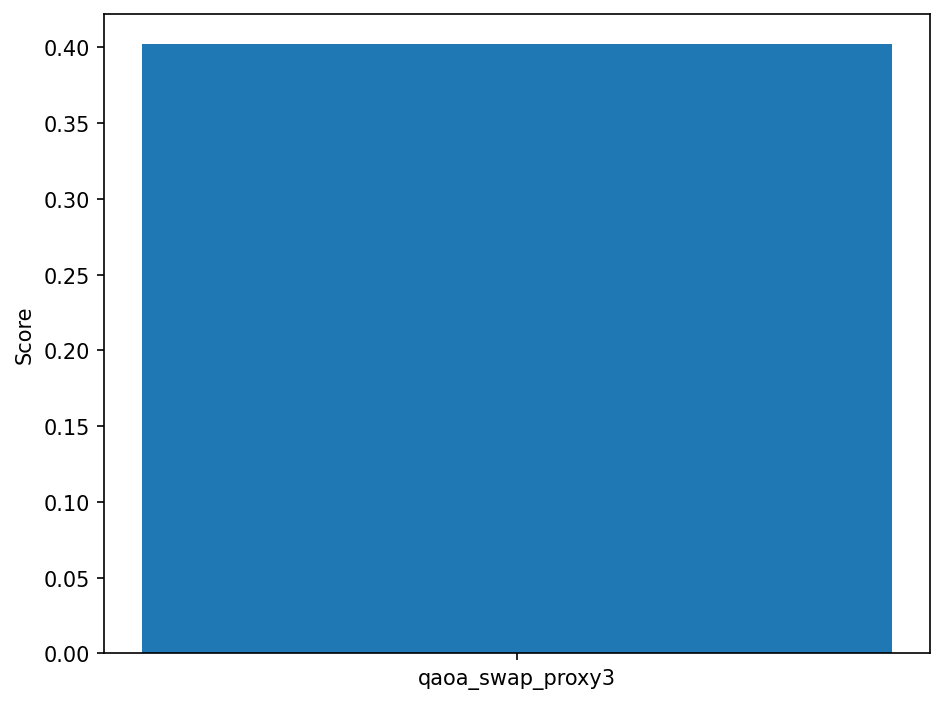

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_vanilla_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.964000016034283


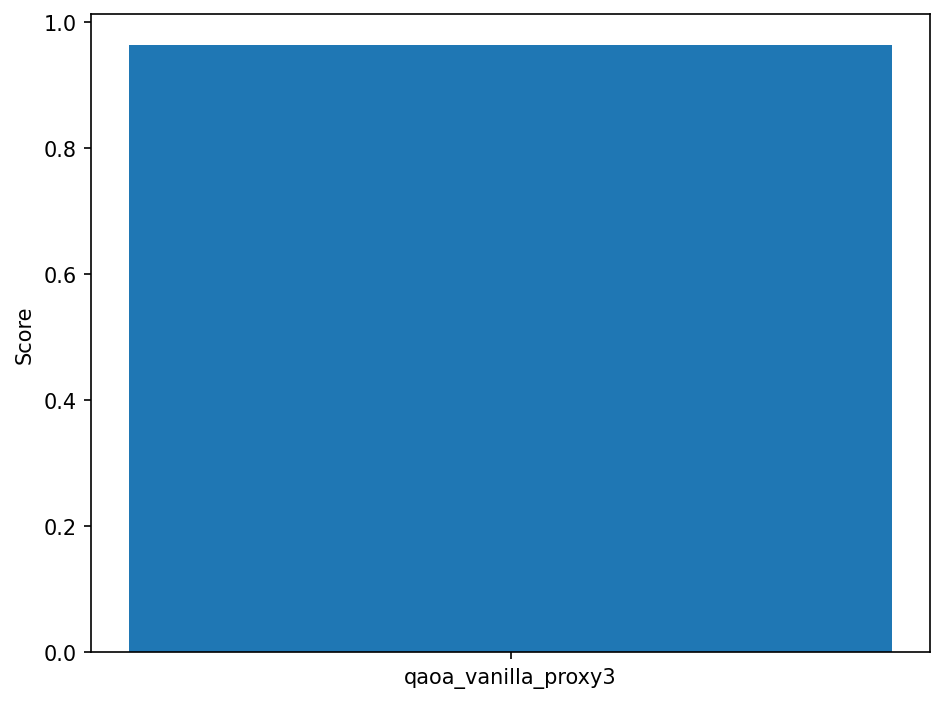

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: bitcode3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.0


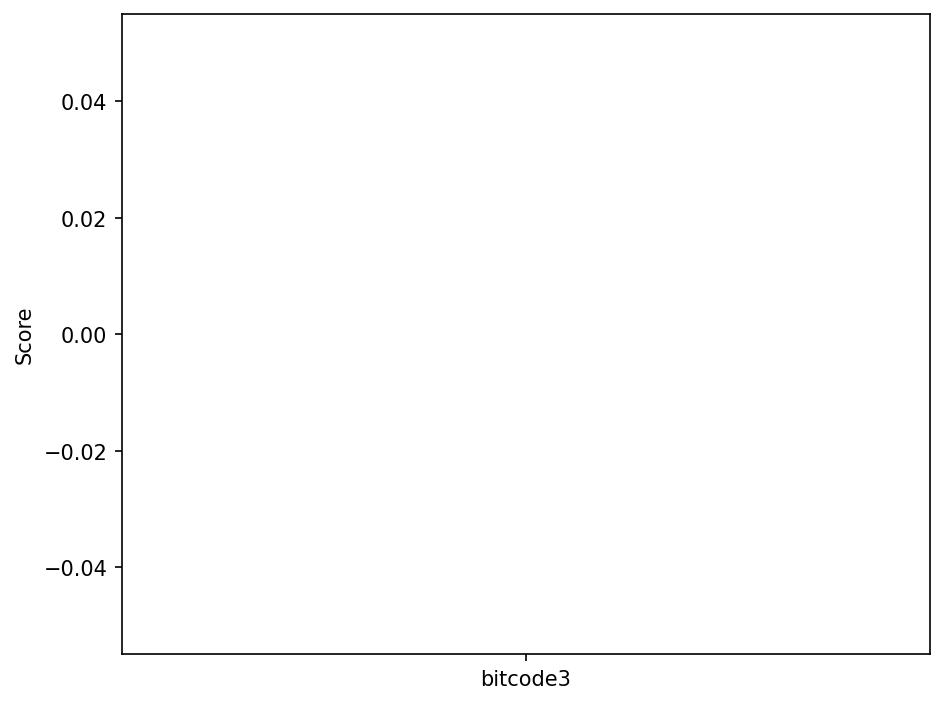

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: ghz3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.8919091835788987


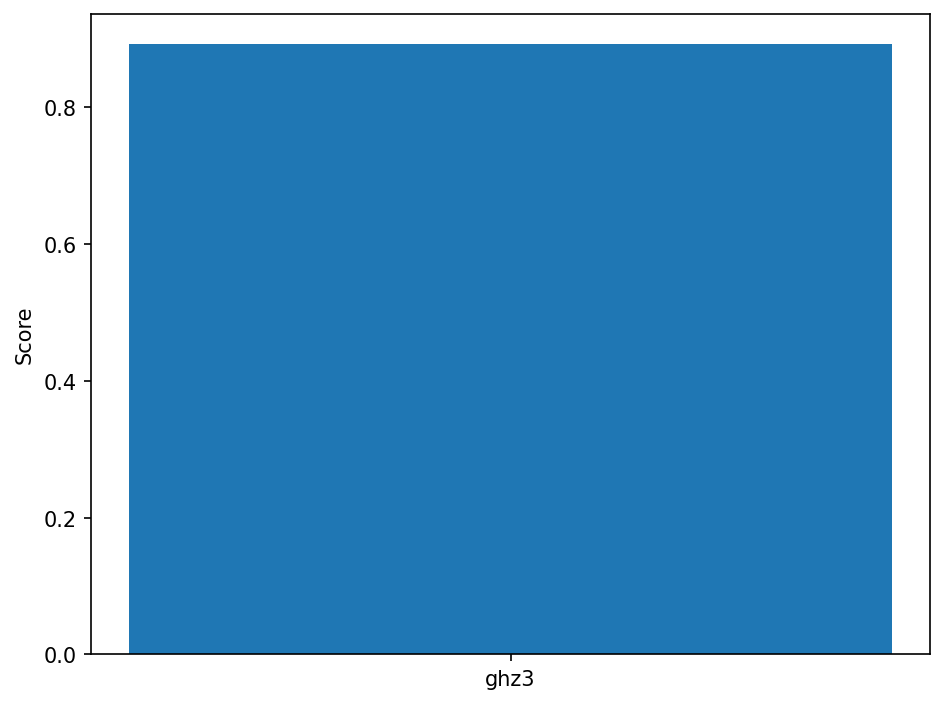

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: hsim3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9771132760733926


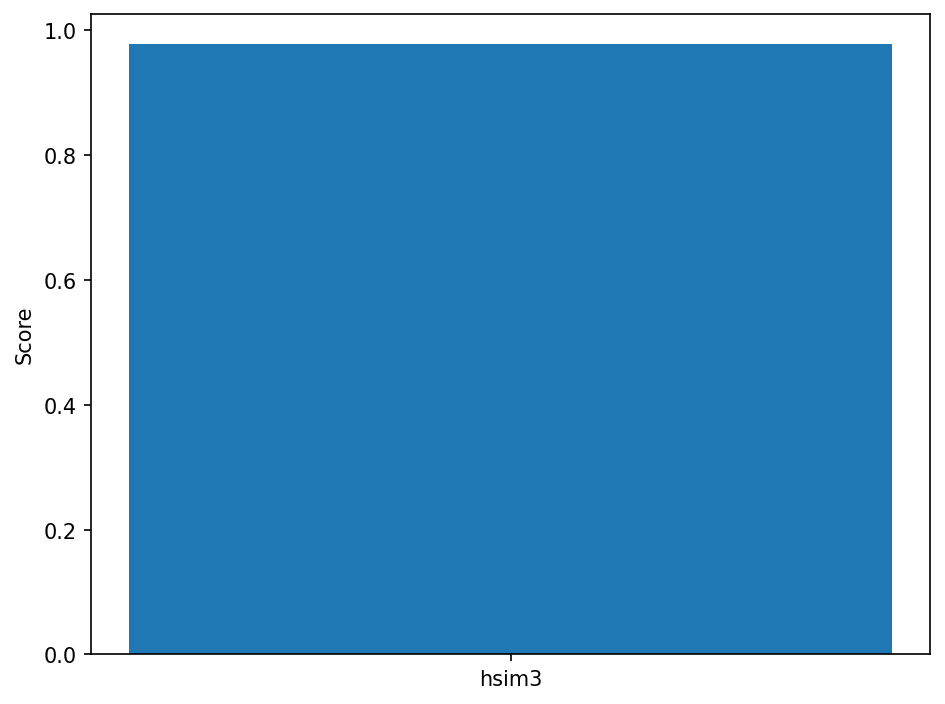

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: marmin_bell_3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.488


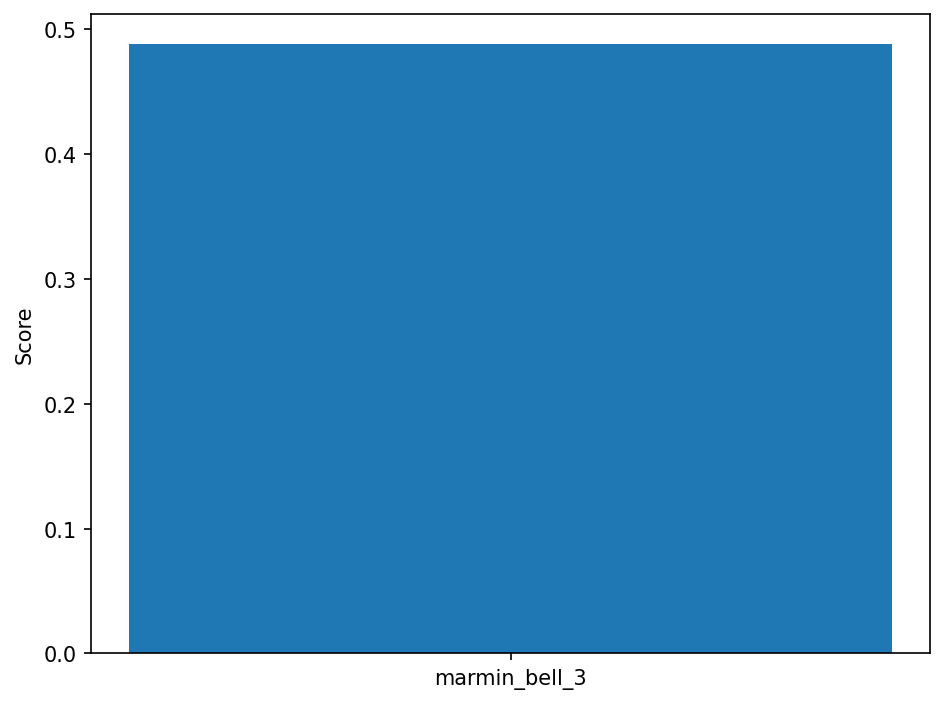

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_swap_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.35199999517987146


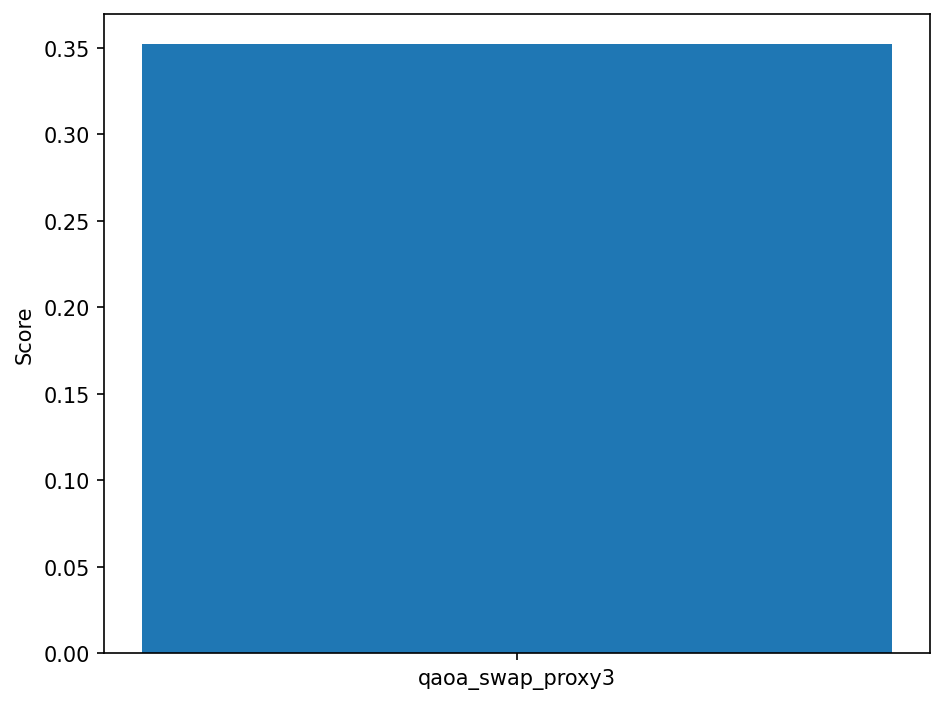

-----------------------------------------------------------
USED BACKEND:: fake_geneva ; CIRCUIT_NAME: qaoa_vanilla_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9280000147902439


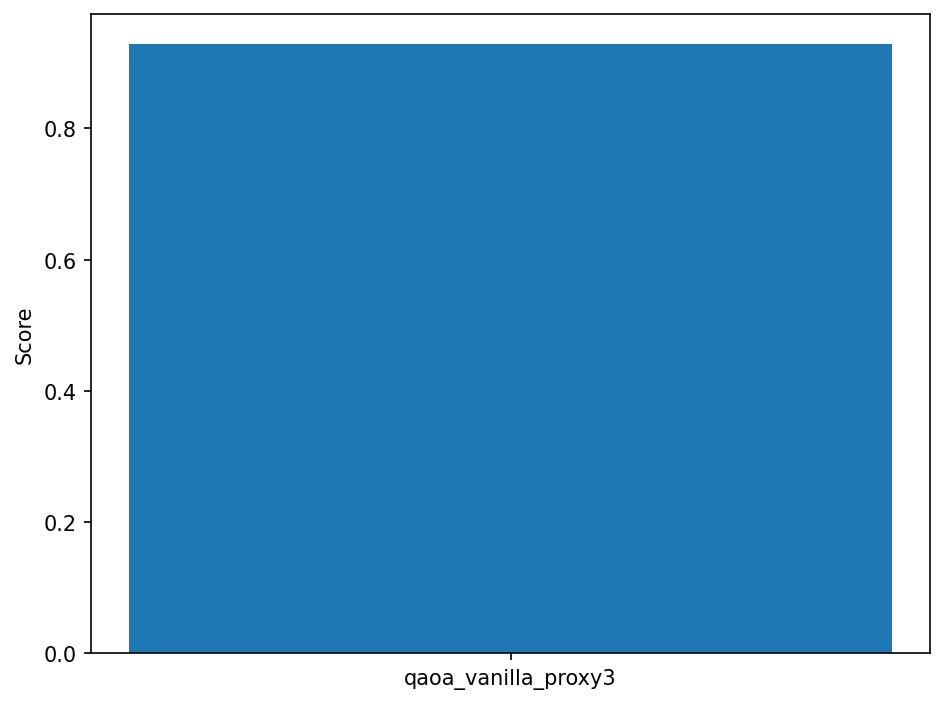

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: bitcode3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.0


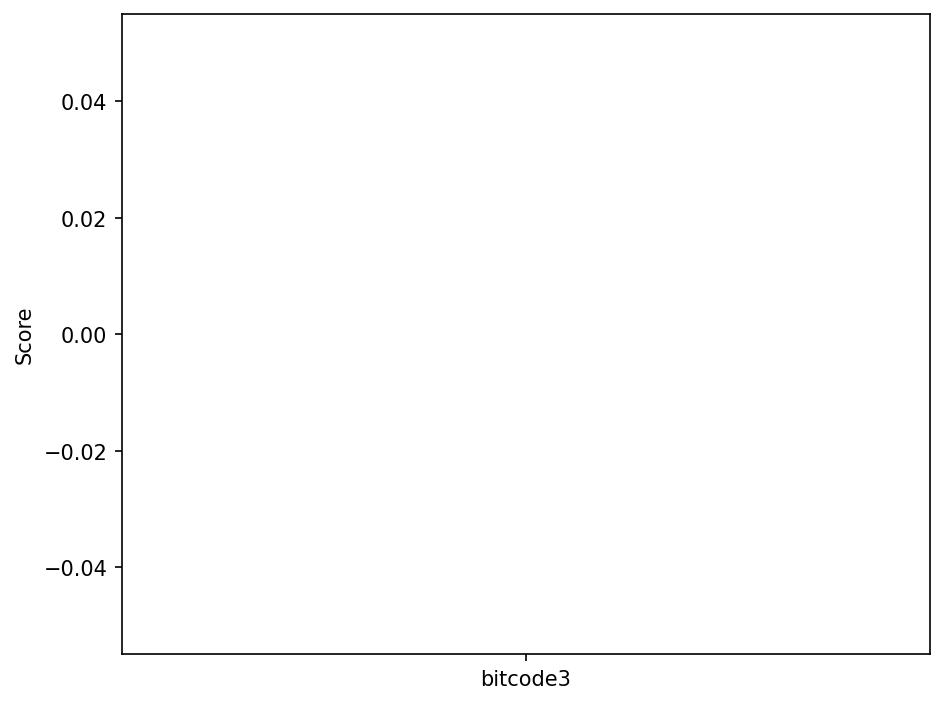

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: ghz3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9728866774491259


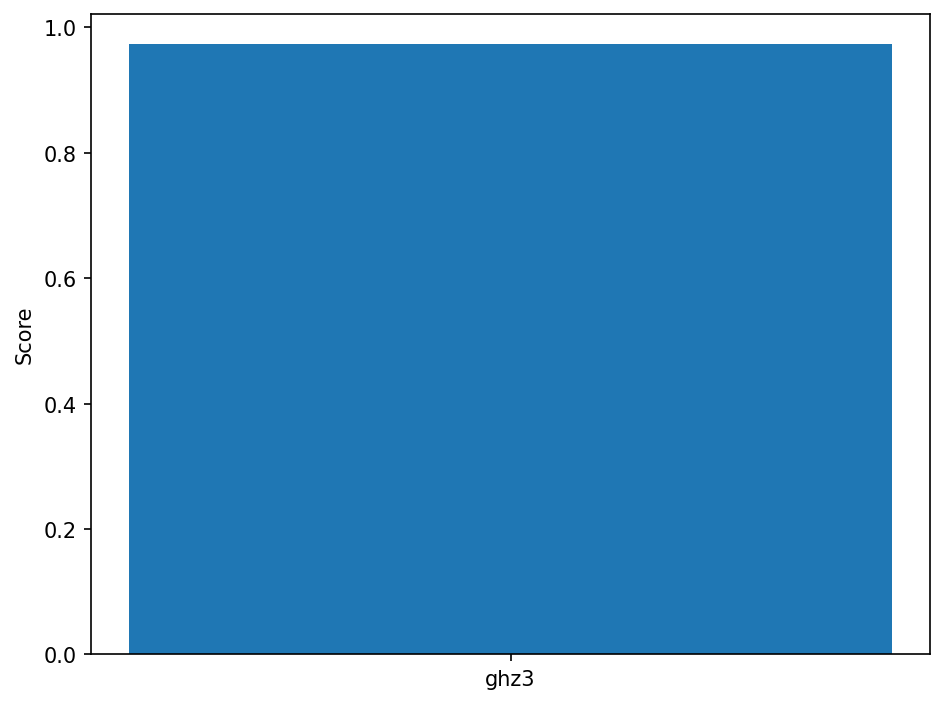

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: hsim3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9938867239266074


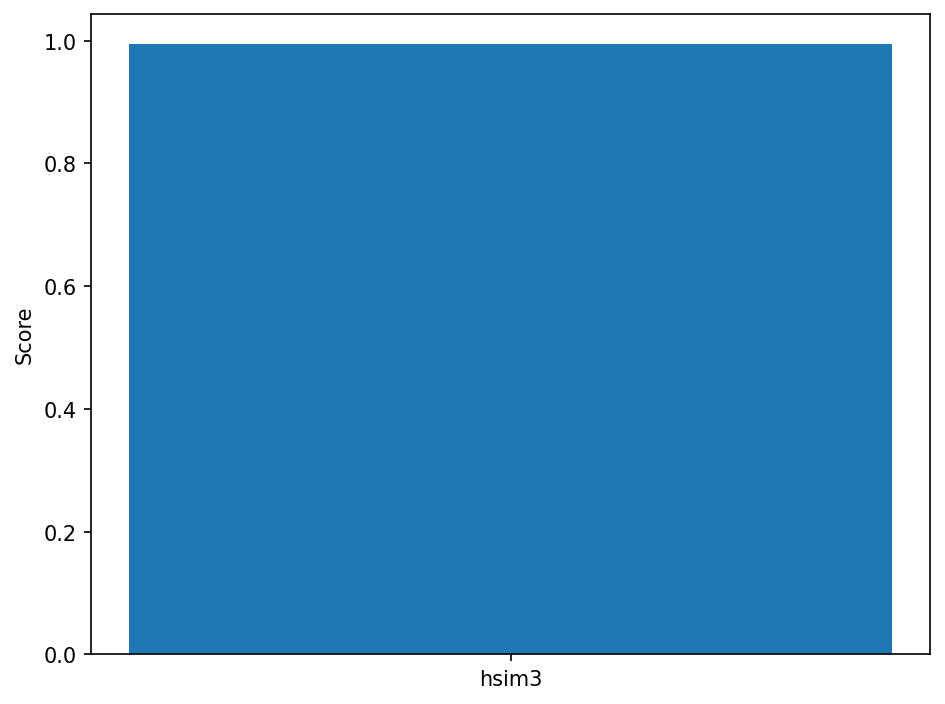

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: marmin_bell_3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.5


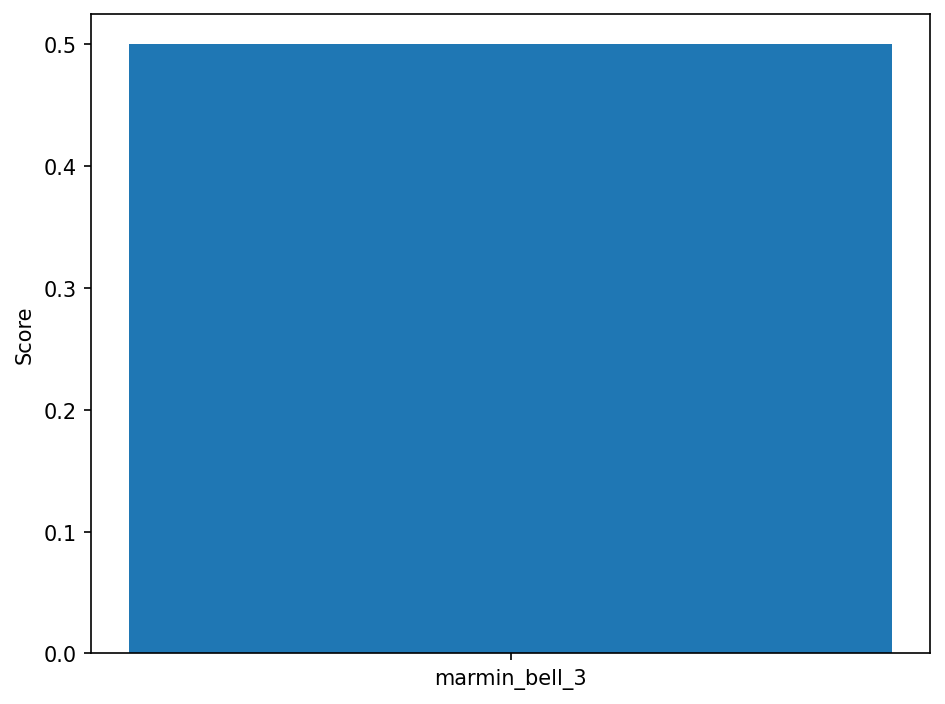

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: qaoa_swap_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.31399999394227074


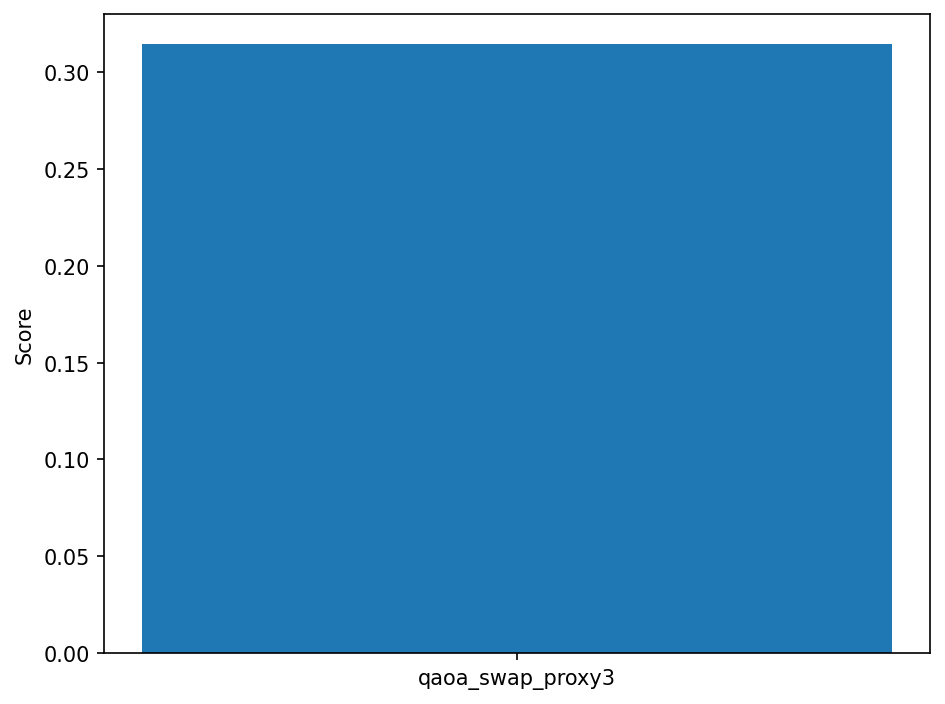

-----------------------------------------------------------
USED BACKEND:: fake_armonk ; CIRCUIT_NAME: qaoa_vanilla_proxy3 ; COUNTS : {'101': 4, '001': 170, '010': 1, '000': 166, '110': 151, '100': 160, '011': 182, '111': 166} ; SCORE = 0.9900000169327557


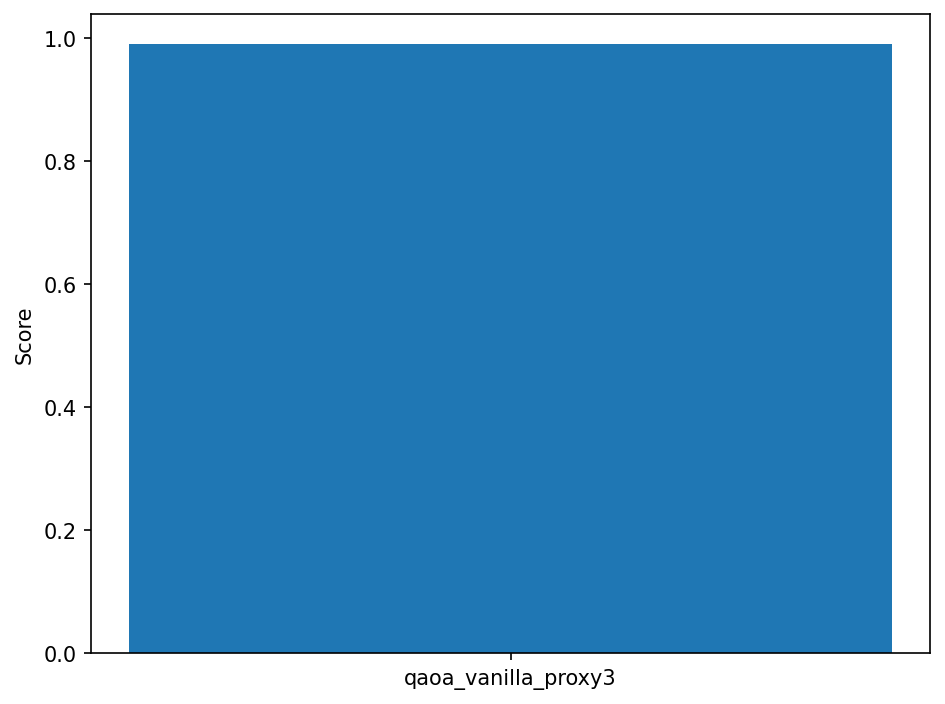

-----------------------------------------------------------


In [8]:
for label,benchmark,backend,job,score in jobs:
    backend=cut(backend)
    print("USED BACKEND::",backend,"; CIRCUIT_NAME:",label,"; COUNTS :", counts, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

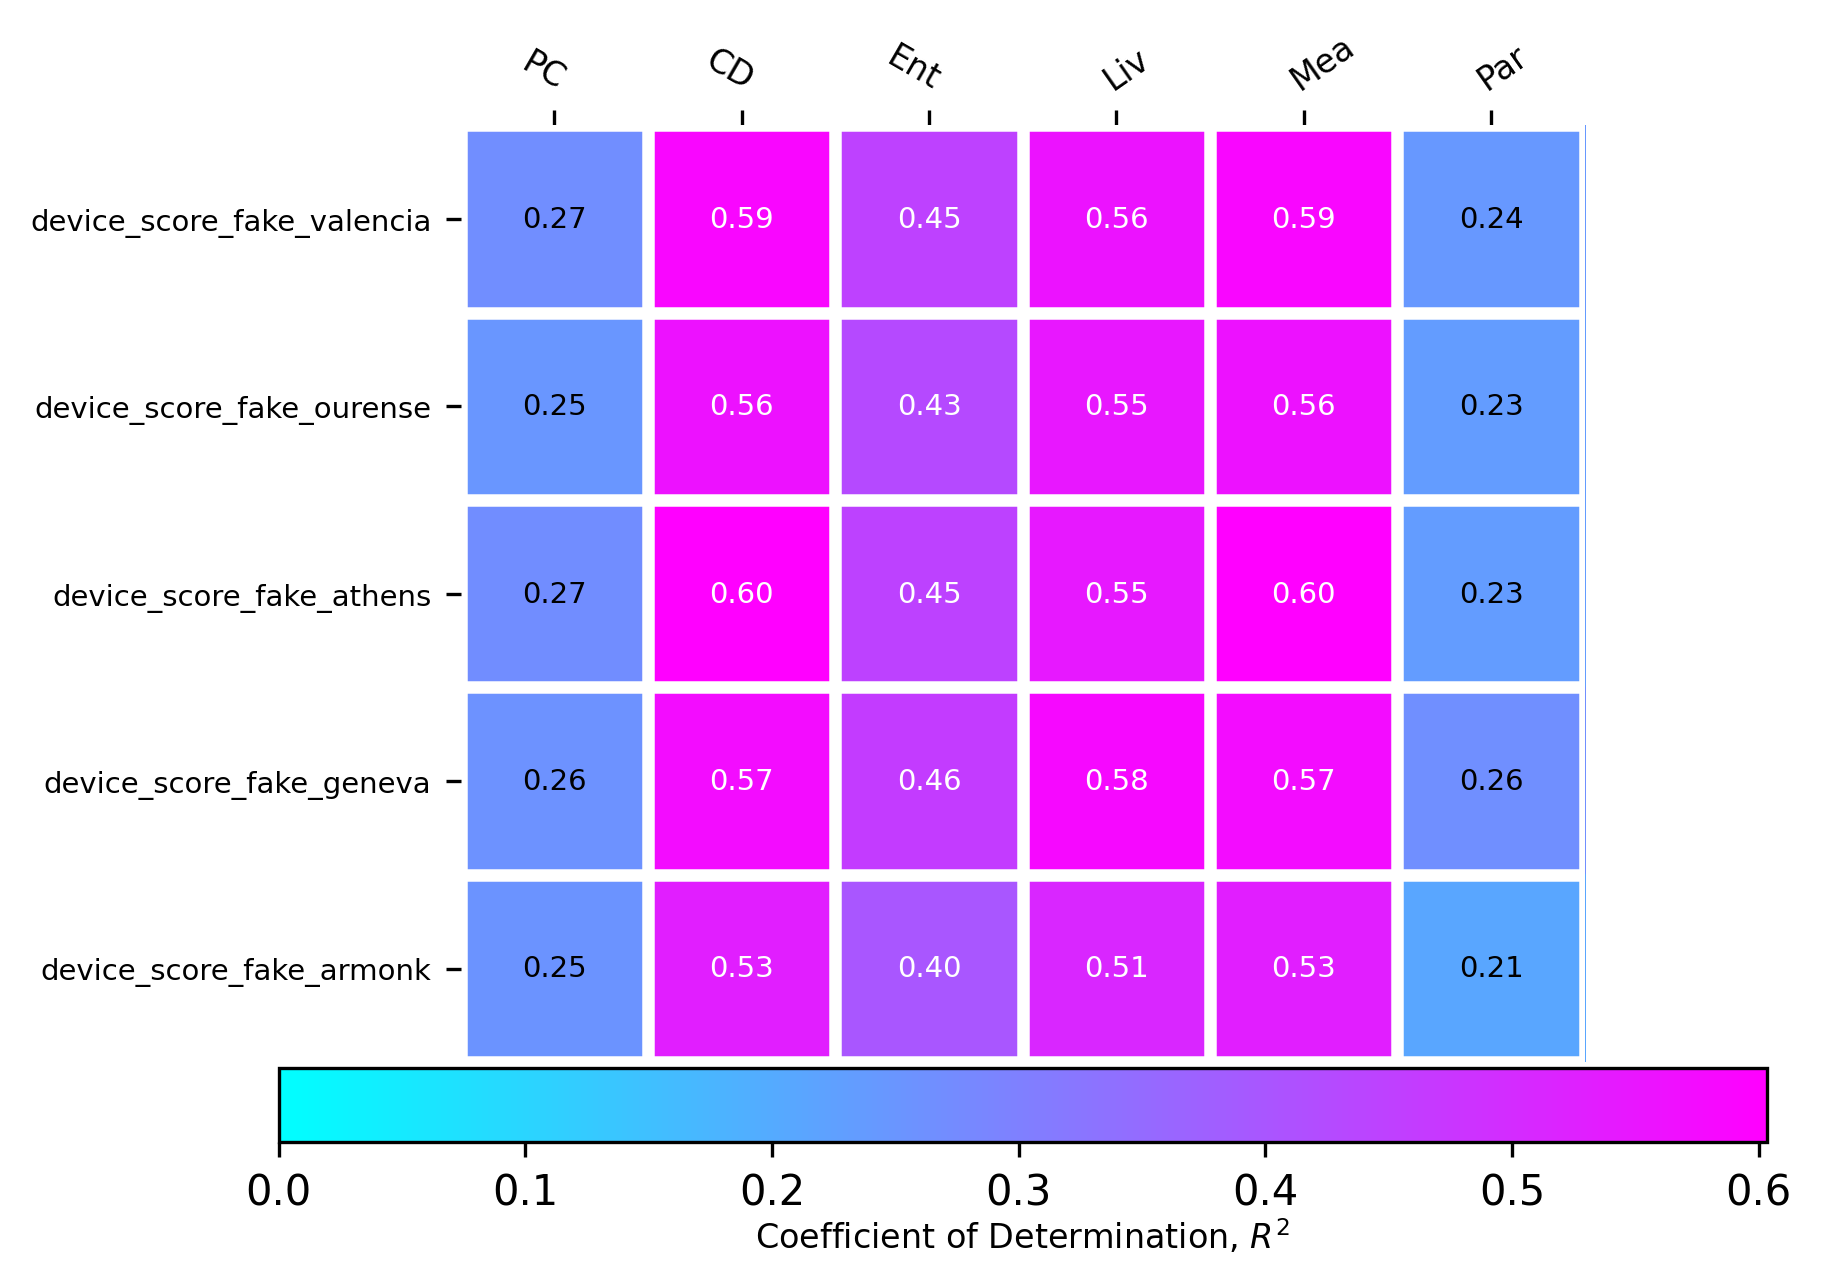

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

bitcode3
0.9900000169327557


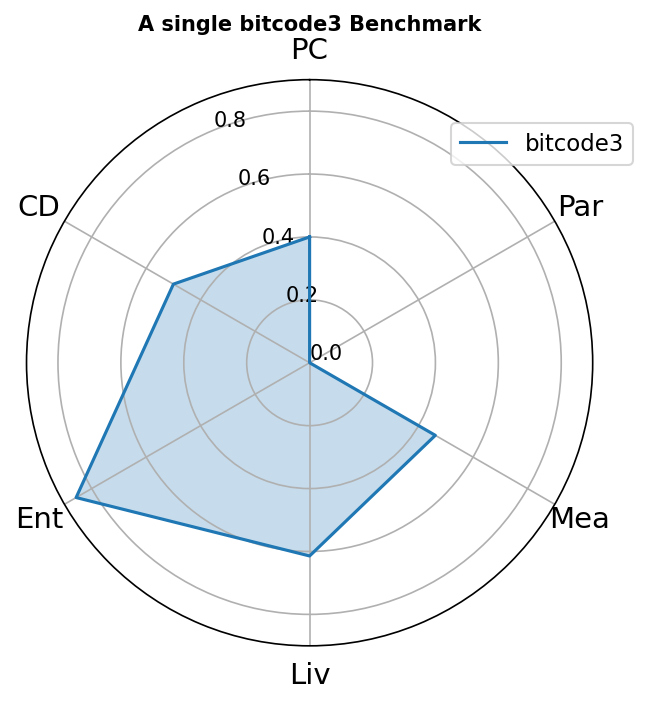

ghz3
0.9900000169327557


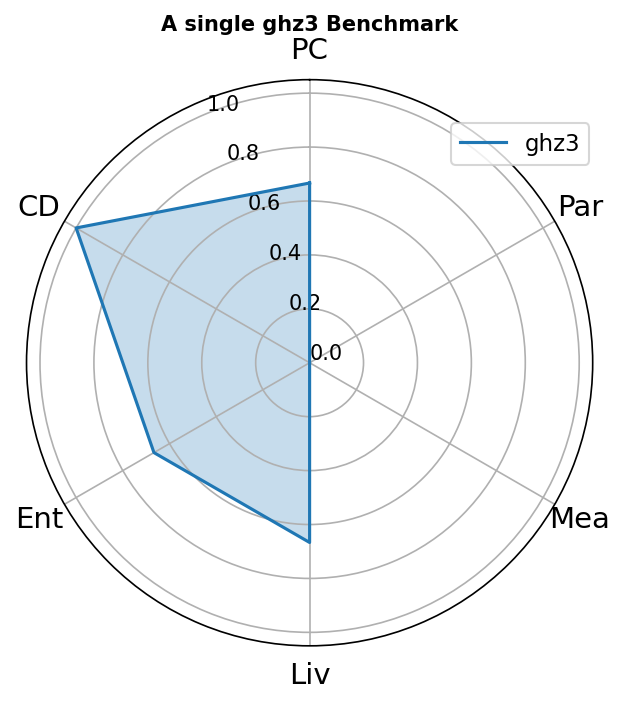

hsim3
0.9900000169327557


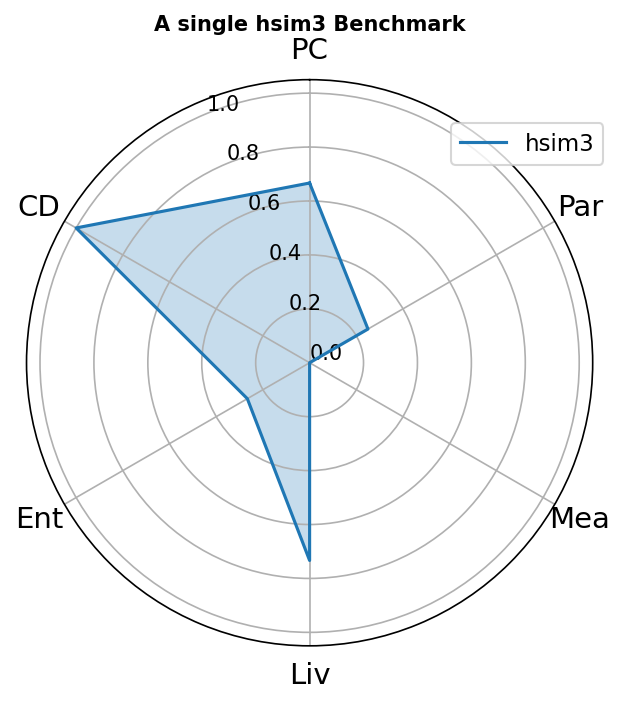

marmin_bell_3
0.9900000169327557


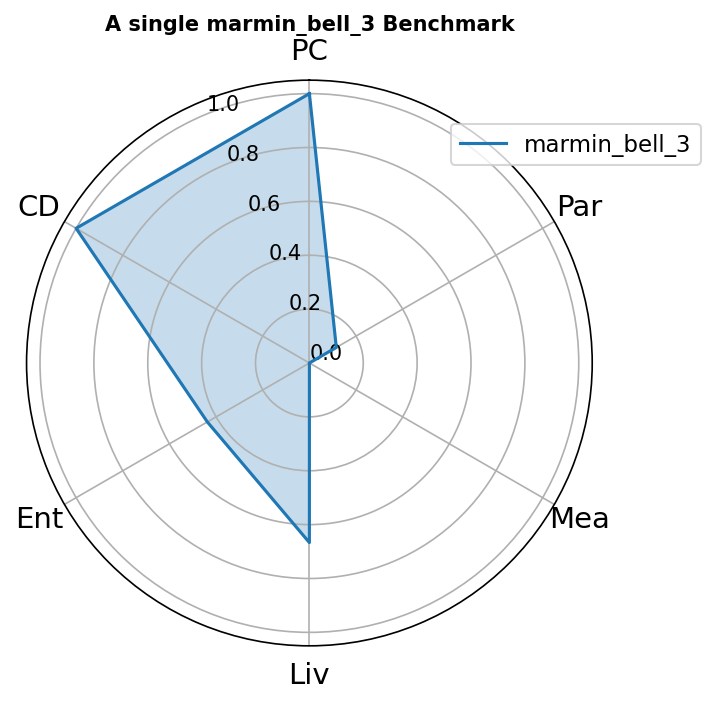

qaoa_swap_proxy3
0.9900000169327557


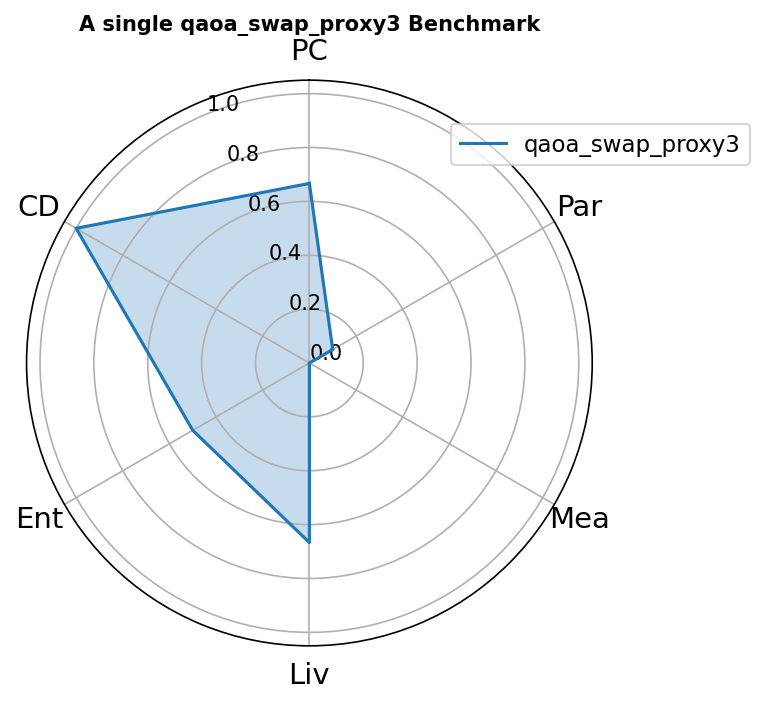

qaoa_vanilla_proxy3
0.9900000169327557


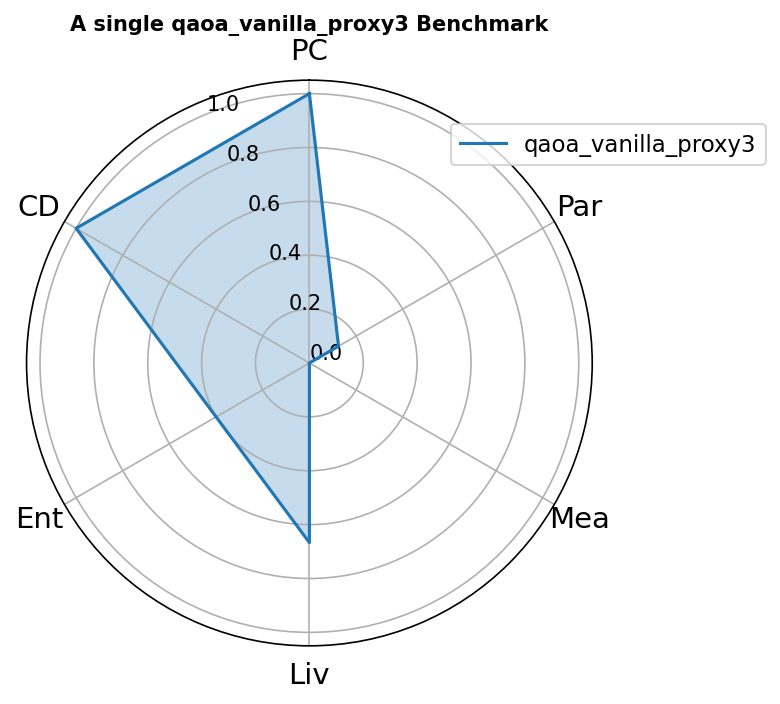

In [18]:
for label, scores in benchmark_features.items(): 
    r="A single "+label+" Benchmark"
    supermarq.plotting.plot_benchmark(
    [r, [label], [scores]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)